In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data=pd.read_csv("onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [15]:
data=data.drop('Unnamed: 12',axis=1)
data.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [17]:
X=data.iloc[:,:-1].values
y=data.iloc[:,11].values
X[0:5],y[0:5]

(array([[20, 'Female', 'Single', 'Student', 'No Income', 'Post Graduate',
         4, 12.9766, 77.5993, 560001, 'Yes'],
        [24, 'Female', 'Single', 'Student', 'Below Rs.10000', 'Graduate',
         3, 12.977, 77.5773, 560009, 'Yes'],
        [22, 'Male', 'Single', 'Student', 'Below Rs.10000',
         'Post Graduate', 3, 12.9551, 77.6593, 560017, 'Yes'],
        [22, 'Female', 'Single', 'Student', 'No Income', 'Graduate', 6,
         12.9473, 77.5616, 560019, 'Yes'],
        [22, 'Male', 'Single', 'Student', 'Below Rs.10000',
         'Post Graduate', 4, 12.985, 77.5533, 560010, 'Yes']], dtype=object),
 array(['Positive', 'Positive', 'Negative ', 'Positive', 'Positive'],
       dtype=object))

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1]= labelEncoder_X.fit_transform(X[:, 1])
X[:, 2]= labelEncoder_X.fit_transform(X[:, 2])
X[:, 3]= labelEncoder_X.fit_transform(X[:, 3])
X[:, 4]= labelEncoder_X.fit_transform(X[:, 4])
X[:, 5]= labelEncoder_X.fit_transform(X[:, 5])
X[:, 10]= labelEncoder_X.fit_transform(X[:, 10])
y= labelEncoder_y.fit_transform(y)
X[0:3],y[0:5]

(array([[20, 0, 2, 3, 4, 2, 4, 12.9766, 77.5993, 560001, 1],
        [24, 0, 2, 3, 2, 0, 3, 12.977, 77.5773, 560009, 1],
        [22, 1, 2, 3, 2, 2, 3, 12.9551, 77.6593, 560017, 1]], dtype=object),
 array([1, 1, 0, 1, 1]))

In [19]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("Gender",OneHotEncoder(),[1,2,3,4,5,10])],remainder="passthrough")
X = ct.fit_transform(X)
X[0:5]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 20, 4, 12.9766, 77.5993,
        560001],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 24, 3, 12.977, 77.5773,
        560009],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 22, 3, 12.9551, 77.6593,
        560017],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 22, 6, 12.9473, 77.5616,
        560019],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 22, 4, 12.985, 77.5533,
        560010]], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train[0:2])
X_test = sc_X.transform(X_test)
print(X_test[0:2])

[[ 1.1612428  -1.1612428   1.61389317 -0.15199444 -1.52752523  1.55131989
  -0.15199444 -0.39587425 -1.10194633 -0.35675303  2.20205736 -0.26956328
  -0.43852901 -0.9745181   1.08066284 -0.26956328 -0.88408664 -0.16275769
  -0.0805823   1.86889101 -1.86889101  1.1377725   1.31092677  0.0730299
  -0.80845468 -0.50872961]
 [ 1.1612428  -1.1612428  -0.6196197  -0.15199444  0.65465367 -0.64461238
  -0.15199444 -0.39587425  0.90748521 -0.35675303 -0.45412078 -0.26956328
  -0.43852901  1.0261482  -0.925358   -0.26956328  1.13111085 -0.16275769
  -0.0805823  -0.53507668  0.53507668 -0.86625861 -1.69934952 -1.95695858
   0.10155587  1.2040629 ]]
[[-0.86114635  0.86114635 -0.6196197  -0.15199444  0.65465367 -0.64461238
  -0.15199444 -0.39587425  0.90748521 -0.35675303 -0.45412078 -0.26956328
  -0.43852901  1.0261482  -0.925358   -0.26956328  1.13111085 -0.16275769
  -0.0805823  -0.53507668  0.53507668 -0.86625861 -0.19421137 -0.93083502
  -1.11583603  1.49491446]
 [-0.86114635  0.86114635  1.61

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5 , metric= 'correlation')
classifier.fit(X_train, y_train)
y_pred_mink = classifier.predict(X_test)
y_test[0:10], y_pred_mink[0:10]

(array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1]), array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_mink)
print(cm)

[[ 6  8]
 [ 6 58]]


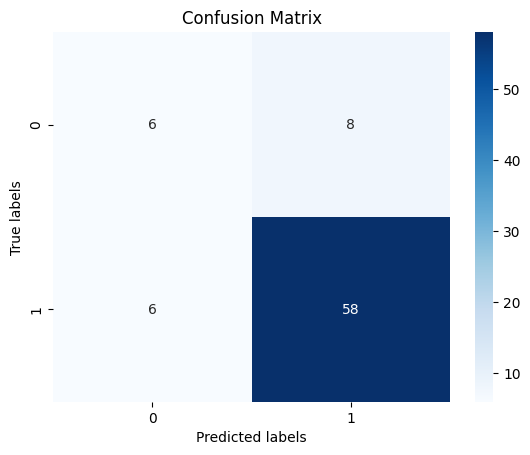

preision: 0.5
recall: 0.42857142857142855
accuracy: 0.8205128205128205
f_measure: 0.4615384615384615


In [25]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
f_measure=2*precision*recall/(precision+recall)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f_measure:",f_measure)